In [1]:
# import necessary packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import confusion_matrix

In [2]:
# reading csv file
df = pd.read_csv('loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


# Preprocessing the data

In [3]:
# drop column loan_id
df = df.drop(['loan_id'], axis=1)
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
# check and print null values
null_values = df.isnull().sum()
print(null_values)

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [5]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [6]:
# converting education, self_employed, loan_status columns to integers
x = [' education', ' self_employed', ' loan_status']
df[x] = pd.get_dummies(df[x], drop_first=True)

In [7]:
# education : 0 - Graduate, 1 - Non Graduate
# self_employed: 0 - No , 1 - Yes
# loan_status: 0 - Approved, 1 - Rejected
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [8]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0    no_of_dependents          4269 non-null   int64
 1    education                 4269 non-null   uint8
 2    self_employed             4269 non-null   uint8
 3    income_annum              4269 non-null   int64
 4    loan_amount               4269 non-null   int64
 5    loan_term                 4269 non-null   int64
 6    cibil_score               4269 non-null   int64
 7    residential_assets_value  4269 non-null   int64
 8    commercial_assets_value   4269 non-null   int64
 9    luxury_assets_value       4269 non-null   int64
 10   bank_asset_value          4269 non-null   int64
 11   loan_status               4269 non-null   uint8
dtypes: int64(9), uint8(3)
memory usage: 312.8 KB


In [9]:
# list for all numeric columns
num_columns = [' no_of_dependents', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value']

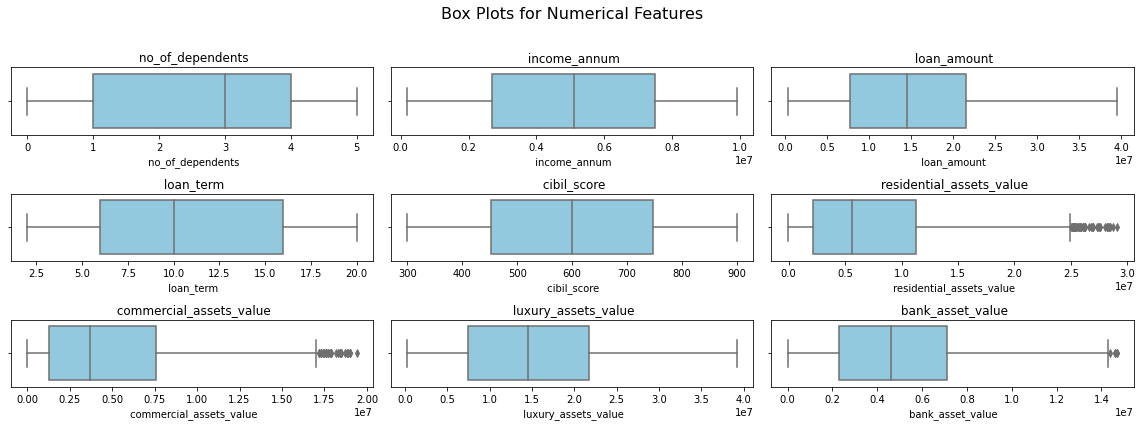

In [10]:
# box plot for all numerical features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 6))
fig.suptitle('Box Plots for Numerical Features', fontsize=16)

axes = axes.flatten()
for i, feature in enumerate(num_columns):
    sns.boxplot(x=df[feature], ax=axes[i], color='skyblue')
    axes[i].set_title(feature)
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [11]:
# function to find unique outlier indexes
def find_outliers(df):
    outliers = []
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        out = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 +1.5 * IQR)]
        outliers.extend(out.index)
    return list(set(outliers)) 

In [12]:
# calling find_outliers function on df
outliers = find_outliers(df)

In [13]:
# drop outliers from original dataframe and reset index
df1 = df.drop(outliers)
df1= df1.reset_index(drop=True)
df1

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
1,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
2,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
3,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
4,0,0,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4173,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4174,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4175,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4176,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [14]:
# dropping columns x(education, self_employed, loan_status columns) for standardization
df2 = df1.drop(x, axis =1)
df2

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
1,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
2,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
3,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000
4,0,4800000,13500000,10,319,6800000,8300000,13700000,5100000
...,...,...,...,...,...,...,...,...,...
4173,5,1000000,2300000,12,317,2800000,500000,3300000,800000
4174,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4175,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4176,1,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [15]:
# standardize the data
scaler = StandardScaler()
df3 = pd.DataFrame(scaler.fit_transform(df2),columns=df2.columns)
df3

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,-1.474828,-0.313055,-0.299596,-0.505979,-1.063361,-0.730704,-0.622353,-0.674662,-0.494853
1,0.295305,1.497850,1.659490,1.597136,-0.546755,-0.013426,-0.075250,2.049186,2.490495
2,0.295305,1.171887,1.771438,-0.505979,-0.773133,1.796070,-0.360695,0.937411,0.950684
3,1.475393,1.751377,1.043777,1.597136,-1.266521,0.850567,0.804873,1.615594,0.039367
4,-1.474828,-0.059528,-0.154063,-0.155460,-1.632209,-0.062331,0.828660,-0.129892,0.070792
...,...,...,...,...,...,...,...,...,...
4173,1.475393,-1.435817,-1.407878,0.195059,-1.643818,-0.714402,-1.026734,-1.286138,-1.280470
4174,-1.474828,-0.602800,-0.400348,1.597136,-0.239113,-0.486177,-0.455843,-0.430072,-0.934799
4175,-0.294740,0.556179,1.010193,1.246617,-0.831179,-0.975230,1.803931,0.359288,0.762136
4176,-0.884784,-0.313055,-0.232427,-0.505979,1.043697,0.165893,-0.979160,-0.085421,0.290765


In [16]:
# correlation_matrix
correlation_matrix = df3.corr()
correlation_matrix

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
no_of_dependents,1.000000,0.008009,-0.005450,-0.021019,-0.010093,0.011700,-0.002614,0.003277,0.009850
income_annum,0.008009,1.000000,0.928089,0.008017,-0.020942,0.625772,0.632890,0.930089,0.850925
loan_amount,-0.005450,0.928089,1.000000,0.005766,-0.016157,0.589841,0.595555,0.863605,0.790220
loan_term,-0.021019,0.008017,0.005766,1.000000,0.008101,0.003088,-0.011102,0.007821,0.015748
cibil_score,-0.010093,-0.020942,-0.016157,0.008101,1.000000,-0.023634,0.005492,-0.025221,-0.017906
residential_assets_value,0.011700,0.625772,0.589841,0.003088,-0.023634,1.000000,0.411363,0.585437,0.517849
commercial_assets_value,-0.002614,0.632890,0.595555,-0.011102,0.005492,0.411363,1.000000,0.587167,0.544407
luxury_assets_value,0.003277,0.930089,0.863605,0.007821,-0.025221,0.585437,0.587167,1.000000,0.788250
bank_asset_value,0.009850,0.850925,0.790220,0.015748,-0.017906,0.517849,0.544407,0.788250,1.000000


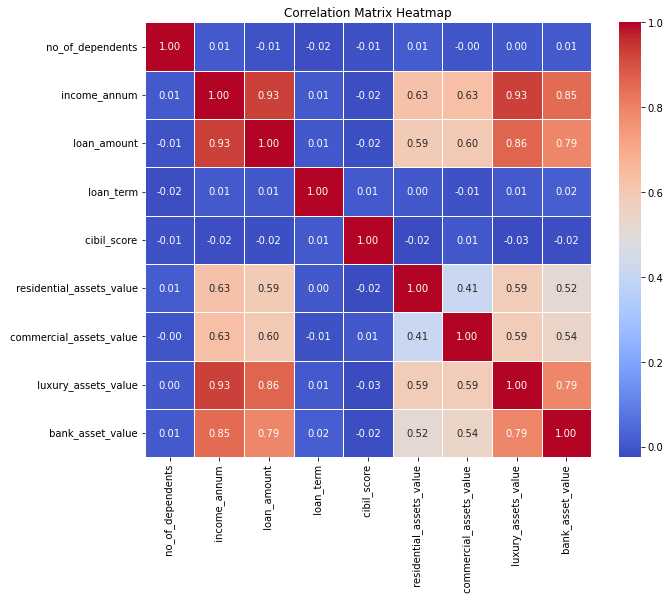

In [17]:
# plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [18]:
# concatenating df3 and x(education, self_employed, loan_status columns)
df4=pd.concat([df3,df1[x]],axis=1)
df4

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,loan_status
0,-1.474828,-0.313055,-0.299596,-0.505979,-1.063361,-0.730704,-0.622353,-0.674662,-0.494853,1,1,1
1,0.295305,1.497850,1.659490,1.597136,-0.546755,-0.013426,-0.075250,2.049186,2.490495,0,0,1
2,0.295305,1.171887,1.771438,-0.505979,-0.773133,1.796070,-0.360695,0.937411,0.950684,0,0,1
3,1.475393,1.751377,1.043777,1.597136,-1.266521,0.850567,0.804873,1.615594,0.039367,1,1,1
4,-1.474828,-0.059528,-0.154063,-0.155460,-1.632209,-0.062331,0.828660,-0.129892,0.070792,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4173,1.475393,-1.435817,-1.407878,0.195059,-1.643818,-0.714402,-1.026734,-1.286138,-1.280470,0,1,1
4174,-1.474828,-0.602800,-0.400348,1.597136,-0.239113,-0.486177,-0.455843,-0.430072,-0.934799,1,1,0
4175,-0.294740,0.556179,1.010193,1.246617,-0.831179,-0.975230,1.803931,0.359288,0.762136,1,0,1
4176,-0.884784,-0.313055,-0.232427,-0.505979,1.043697,0.165893,-0.979160,-0.085421,0.290765,1,0,0


In [19]:
# dropping luxury_assets_value as they are highly correlated with income_annum
df5 = df4.drop([" luxury_assets_value"],axis=1)
df5

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,bank_asset_value,education,self_employed,loan_status
0,-1.474828,-0.313055,-0.299596,-0.505979,-1.063361,-0.730704,-0.622353,-0.494853,1,1,1
1,0.295305,1.497850,1.659490,1.597136,-0.546755,-0.013426,-0.075250,2.490495,0,0,1
2,0.295305,1.171887,1.771438,-0.505979,-0.773133,1.796070,-0.360695,0.950684,0,0,1
3,1.475393,1.751377,1.043777,1.597136,-1.266521,0.850567,0.804873,0.039367,1,1,1
4,-1.474828,-0.059528,-0.154063,-0.155460,-1.632209,-0.062331,0.828660,0.070792,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4173,1.475393,-1.435817,-1.407878,0.195059,-1.643818,-0.714402,-1.026734,-1.280470,0,1,1
4174,-1.474828,-0.602800,-0.400348,1.597136,-0.239113,-0.486177,-0.455843,-0.934799,1,1,0
4175,-0.294740,0.556179,1.010193,1.246617,-0.831179,-0.975230,1.803931,0.762136,1,0,1
4176,-0.884784,-0.313055,-0.232427,-0.505979,1.043697,0.165893,-0.979160,0.290765,1,0,0


In [20]:
# class distribution for target feature loan_status
class_distribution = df5[' loan_status'].value_counts()
print(class_distribution)

0    2603
1    1575
Name:  loan_status, dtype: int64


In [21]:
# handling imbalance data using SMOTE
a = df5.drop(' loan_status', axis=1)
b = df5[' loan_status']
smote = SMOTE(random_state=42)
X, y  = smote.fit_resample(a, b)
data = pd.concat([pd.DataFrame(X, columns=a.columns), pd.Series(y, name=' loan_status')], axis=1)

In [22]:
# class distribution for target feature loan_status after handling imbalance data
class_distribution = data[' loan_status'].value_counts()
print(class_distribution)

1    2603
0    2603
Name:  loan_status, dtype: int64


In [23]:
# final data after preprocessing
data

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,bank_asset_value,education,self_employed,loan_status
0,-1.474828,-0.313055,-0.299596,-0.505979,-1.063361,-0.730704,-0.622353,-0.494853,1,1,1
1,0.295305,1.497850,1.659490,1.597136,-0.546755,-0.013426,-0.075250,2.490495,0,0,1
2,0.295305,1.171887,1.771438,-0.505979,-0.773133,1.796070,-0.360695,0.950684,0,0,1
3,1.475393,1.751377,1.043777,1.597136,-1.266521,0.850567,0.804873,0.039367,1,1,1
4,-1.474828,-0.059528,-0.154063,-0.155460,-1.632209,-0.062331,0.828660,0.070792,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5201,0.435069,1.402511,0.706770,-1.391481,-0.557754,1.417250,-0.961007,1.731317,1,1,1
5202,0.295305,1.111822,0.958597,-0.232390,-0.790986,0.008041,0.253137,1.278725,0,0,1
5203,-1.312680,-1.086354,-1.016061,1.342941,-1.406452,-0.751858,-0.861497,-1.036271,0,0,1
5204,1.370728,0.411870,-0.018658,0.732110,-1.081239,-0.642075,1.429457,0.766667,1,1,1


# Logistic Regression

In [24]:
# Logistic Regression class
class LogisticRegression:
    # constructor for the LogisticRegression class.
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate  
        self.num_iterations = num_iterations  
        self.weights = None 
        self.bias = None  

    # sigmoid function which maps input 'z' to a value between 0 and 1
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # fit the logistic regression model to the training data.
    def fit(self, X, y):
        num_samples, num_features = X.shape  
        self.weights = np.zeros(num_features)  
        self.bias = 0 

        for _ in range(self.num_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)
            cost = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
            dw = (1 / num_samples) * np.dot(X.T, (predictions - y))
            db = (1 / num_samples) * np.sum(predictions - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # predict the labels for given input features X using the trained model.
    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return [1 if p >= 0.5 else 0 for p in predictions]

In [25]:
# cross_validation for Logistic Regression
def k_fold_cross_validation_LR(X, y, k_folds=5, learning_rate=0.01, num_iterations=1000):
    # Create a holdout test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    fold_size = len(X_train) // k_folds
    
    # Lists to store the metrics for each fold
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    roc_aucs = []
    confusion_matrices = []

    # Loop through each fold
    for i in range(k_folds):
        start, end = i * fold_size, (i + 1) * fold_size
        X_val, y_val = X_train[start:end], y_train[start:end]
        X_train_fold = np.concatenate((X_train[:start], X_train[end:]), axis=0)
        y_train_fold = np.concatenate((y_train[:start], y_train[end:]))

        # Initializing and fitting the logistic regression model
        model = LogisticRegression(learning_rate=learning_rate, num_iterations=num_iterations)
        model.fit(X_train_fold, y_train_fold)

        # Predicting on the validation set
        predictions = model.predict(X_val)

        # Calculating and appending each metric for the current fold
        accuracies.append(np.mean(predictions == y_val))
        precisions.append(precision_score(y_val, predictions))
        recalls.append(recall_score(y_val, predictions))
        f1_scores.append(f1_score(y_val, predictions))
        roc_aucs.append(roc_auc_score(y_val, model.sigmoid(np.dot(X_val, model.weights) + model.bias)))
        confusion_matrices.append(confusion_matrix(y_val, predictions))

    # Training the final model on the entire training set
    final_model = LogisticRegression(learning_rate=learning_rate, num_iterations=num_iterations)
    final_model.fit(X_train, y_train)

    # Evaluating the final model on the holdout test set
    test_predictions = final_model.predict(X_test)
    
    mean_confusion_matrix = np.mean(confusion_matrices, axis=0).astype(int)

    # Calculating metrics for the holdout test set
    test_accuracy = np.mean(test_predictions == y_test)
    test_precision = precision_score(y_test, test_predictions)
    test_recall = recall_score(y_test, test_predictions)
    test_f1_score = f1_score(y_test, test_predictions)
    test_roc_auc = roc_auc_score(y_test, final_model.sigmoid(np.dot(X_test, final_model.weights) + final_model.bias))
    

    # Returning the mean of each metric across all folds and metrics for the holdout test set
    return (np.mean(accuracies), np.mean(precisions), np.mean(recalls), np.mean(f1_scores), np.mean(roc_aucs), test_accuracy,
            test_precision, test_recall, test_f1_score, test_roc_auc, mean_confusion_matrix)


In [26]:
# calling cross_validation_LR function on data with different k values
X = data.drop([" loan_status"], axis=1).values  
y = data[" loan_status"].values  

# Specifying different learning rates and numbers of iterations to test
learning_rates = [0.01, 0.1, 0.5]
num_iterations = [1000, 2000, 3000]

# Looping through different combinations of learning rates and iterations
for lr in learning_rates:
    for iterations in num_iterations:
        mean_accuracy, mean_precision, mean_recall, mean_f1_score, mean_roc_auc, \
        test_accuracy, test_precision, test_recall, test_f1_score, test_roc_auc, mean_confusion_matrix = k_fold_cross_validation_LR(
            X, y, learning_rate=lr, num_iterations=iterations
        )

        # Printing the mean metrics for each combination of hyperparameters
        print(f"LR={lr}, Iterations={iterations}: "
              f"Mean Accuracy={mean_accuracy}, Mean Precision={mean_precision}, "
              f"Mean Recall={mean_recall}, Mean F1-Score={mean_f1_score}, Mean ROC-AUC={mean_roc_auc}, "
              f"Test Accuracy={test_accuracy}, Test Precision={test_precision}, "
              f"Test Recall={test_recall}, Test F1-Score={test_f1_score}, Test ROC-AUC={test_roc_auc}",
              f"Mean Confusion Matrix:\n{mean_confusion_matrix}"
             )
        print("********************************************************************************************")

LR=0.01, Iterations=1000: Mean Accuracy=0.9247596153846154, Mean Precision=0.8799079654113999, Mean Recall=0.9835420016563774, Mean F1-Score=0.9287566933048058, Mean ROC-AUC=0.967352774015688, Test Accuracy=0.927063339731286, Test Precision=0.8785834738617201, Test Recall=0.9923809523809524, Test F1-Score=0.9320214669051878, Test ROC-AUC=0.9621516072579902 Mean Confusion Matrix:
[[360  55]
 [  6 408]]
********************************************************************************************
LR=0.01, Iterations=2000: Mean Accuracy=0.929326923076923, Mean Precision=0.893432280193674, Mean Recall=0.9747641201160431, Mean F1-Score=0.932198202943536, Mean ROC-AUC=0.9675772617419925, Test Accuracy=0.9395393474088292, Test Precision=0.9010416666666666, Test Recall=0.9885714285714285, Test F1-Score=0.9427792915531334, Test ROC-AUC=0.9625900340793958 Mean Confusion Matrix:
[[368  48]
 [ 10 405]]
********************************************************************************************
LR=0.

In [27]:
# training entire data with selected parameters
X_train=data.drop([" loan_status"],axis=1).values
y_train=data[" loan_status"].values

lr = LogisticRegression(learning_rate=0.1, num_iterations=1000)
lr.fit(X_train,y_train)

In [28]:
# sample checking
lr.predict([[-0.884784,-0.313055,-0.232427,-0.505979,1.043697,0.165893,-0.979160,0.290765,1,0]])

[0]

In [29]:
# dumping to pickle file
file_path = 'C:/Users/WINDOWS/Downloads/Project/lr_model.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(lr, file)

In [30]:
with open('lr_model.pkl','rb') as file:
    loaded_model = pickle.load(file)

In [32]:
loaded_model.predict([[-0.884784,-0.313055,-0.232427,-0.505979,1.043697,0.165893,-0.979160,0.290765,1,0]])

[0]

In [33]:
loaded_model.predict([[-1.474828,-0.313055,-0.299596,-0.505979,-1.063361,-0.730704,-0.622353,-0.494853,1,1]])

[1]

In [36]:
obj = pd.read_pickle(r'C:/Users/WINDOWS/Downloads/Project/lr_model.pkl')

In [38]:
print(obj)